1. Cargar el conjunto de datos en una estructura adecuada para su manipulación.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Automobile.csv")
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


2. Crear un gráfico de dispersión para visualizar las relaciones entre los pares de características numéricas `mpg` y `weight`.

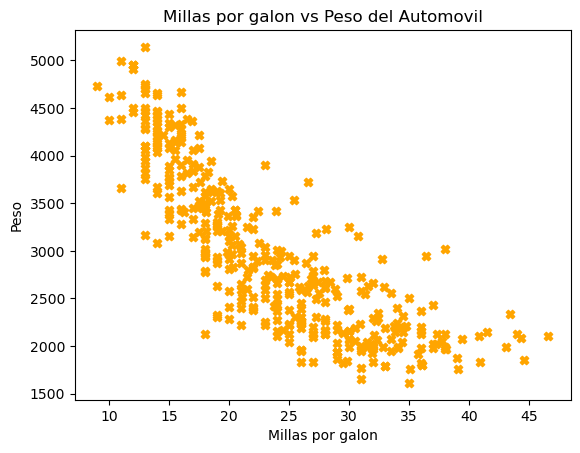

In [5]:
plt.scatter(df.mpg, df.weight, c="Orange", marker="X")
plt.title("Millas por galon vs Peso del Automovil")
plt.xlabel("Millas por galon")
plt.ylabel("Peso")
plt.show()

3. Generar un histograma del consumo de combustible (`mpg`) para analizar su distribución.

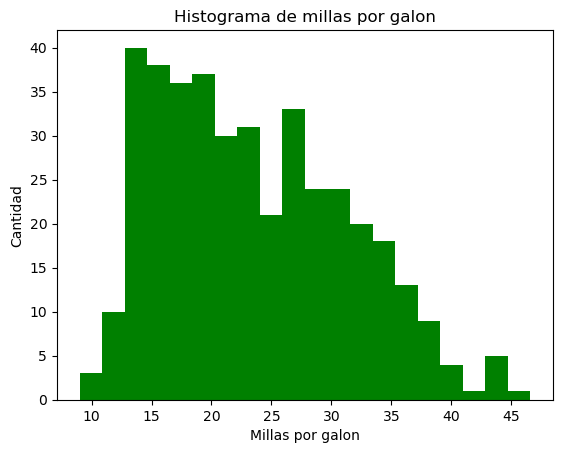

In [6]:
plt.hist(df.mpg, color="green",bins=20)
plt.title("Histograma de millas por galon")
plt.xlabel("Millas por galon")
plt.ylabel("Cantidad")
plt.show()

4. Graficar un diagrama de caja (boxplot) de las características `cylinders` y `origin` para identificar posibles valores atípicos.

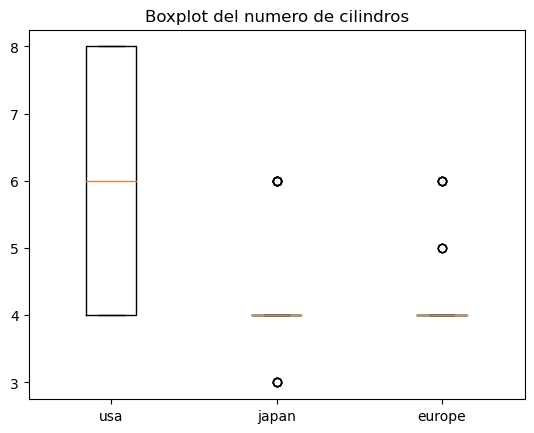

In [73]:
#el campo origin contiene datos de tipo categorico nominal, no realice la conversion a numeros debido a que se asumiria un orden de jerarquia inexistente a mayor numero.
#en su lugar utilice la variable para agrupar los boxplots
datos = [df[df.origin == "usa"].cylinders, df[df.origin == "japan"].cylinders, df[df.origin == "europe"].cylinders] #creo una lista con los valores de los distintos boxplots
labels = df.origin.unique() 
plt.boxplot(datos, labels = labels)
plt.title("Boxplot del numero de cilindros por lugar de origen")
plt.show()




5. Realizar un gráfico de barras que muestre la distribución de automóviles según su año de modelo (`model_year`) y origen (`origin`).

In [54]:
#Vemos los distintos origenes posibles
origenes = df.origin.unique()
print(origenes)


['usa' 'japan' 'europe']


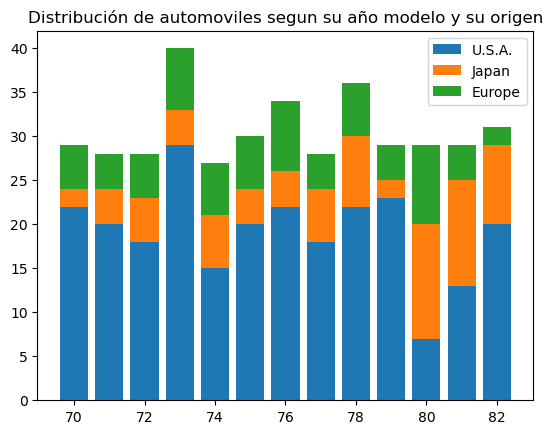

In [57]:
#separamos el dataframe por los distintos origenes
df_usa = df[df.origin == "usa"]
df_japan = df[df.origin == "japan"]
df_europe = df[df.origin == "europe"]
fig,ax = plt.subplots()
#creamos cada grafico de barras, el parametro bottom seteado como los valores del grafico anterior indica donde comienza la barra del siguiente grafico
ax.bar(df_usa.model_year.unique(),df_usa.groupby(["model_year"]).model_year.count(), label = "U.S.A.")
ax.bar(df_japan.model_year.unique(),df_japan.groupby(["model_year"]).model_year.count(), bottom = df_usa.groupby(["model_year"]).model_year.count(), label = "Japan")
ax.bar(df_europe.model_year.unique(),df_europe.groupby(["model_year"]).model_year.count(), bottom = df_usa.groupby(["model_year"]).model_year.count() + df_japan.groupby(["model_year"]).model_year.count(), label = "Europe")
ax.legend()
plt.title("Distribución de automoviles segun su año modelo y su origen")
plt.show()